# LABELING DATA USE NLTK

In [ ]:
import pandas as pd
import numpy as np

def load_data():
  data = pd.read_csv('/content/Hasil_Preprocessing_Data.csv')
  return data

data = load_data()
data.head()

,full_text,cleaning,case_folding,tokenize,filtering/stopword removal,stemming_data
0,Haaii aku jual netflix 1 bulan sebulan 20k aja...,Haaii aku jual netflix bulan sebulan k aja la...,haaii aku jual netflix bulan sebulan k aja la...,"['haaii', 'aku', 'jual', 'netflix', 'bulan', '...","['haaii', 'jual', 'netflix', 'sebulan', 'k', '...",haaii jual netflix bulan k aja promo yuukk pu ...
1,Terlepas apakah yang dilakukan Netflix dengan ...,Terlepas apakah yang dilakukan Netflix dengan ...,terlepas apakah yang dilakukan netflix dengan ...,"['terlepas', 'apakah', 'yang', 'dilakukan', 'n...","['terlepas', 'netflix', 'menayangkan', 'film',...",lepas netflix tayang film dokumenter ice cold ...
2,"Watched Ice Cold documentary on Netflix, the m...",Watched Ice Cold documentary on Netflix the mo...,watched ice cold documentary on netflix the mo...,"['watched', 'ice', 'cold', 'documentary', 'on'...","['watched', 'ice', 'cold', 'documentary', 'on'...",watched ice cold documentary on netflix the mo...
3,Ice Cold on Netflix is so good,Ice Cold on Netflix is so good,ice cold on netflix is so good,"['ice', 'cold', 'on', 'netflix', 'is', 'so', '...","['ice', 'cold', 'on', 'netflix', 'is', 'so', '...",ice cold on netflix is so good
4,https://t.co/dBHtffcYLr People who have alread...,httpstcodBHtffcYLr People who have already wat...,httpstcodbhtffcylr people who have already wat...,"['httpstcodbhtffcylr', 'people', 'who', 'have'...","['httpstcodbhtffcylr', 'people', 'who', 'have'...",httpstcodbhtffcylr people who have already wat...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   full_text                   150 non-null    object
 1   cleaning                    150 non-null    object
 2   case_folding                150 non-null    object
 3   tokenize                    150 non-null    object
 4   filtering/stopword removal  150 non-null    object
 5   stemming_data               150 non-null    object
dtypes: object(6)
memory usage: 7.2+ KB


In [ ]:
df = pd.DataFrame(data['stemming_data'])
df2 = df.copy()
df.head()

,stemming_data
0,haaii jual netflix bulan k aja promo yuukk pu ...
1,lepas netflix tayang film dokumenter ice cold ...
2,watched ice cold documentary on netflix the mo...
3,ice cold on netflix is so good
4,httpstcodbhtffcylr people who have already wat...


In [ ]:
!pip install nltk
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
data = SentimentIntensityAnalyzer()

labels = []
scores = []

for text in df['stemming_data']:
  sentiment_scores = data.polarity_scores(text)
  compound_scores = sentiment_scores['compound']

  scores.append(compound_scores)

  if compound_scores > 0 :
    label = 'positive'
  elif compound_scores < 0:
    label = 'negative'
  elif compound_scores == 0:
    label = 'neutral'

  labels.append(label)



In [ ]:
df['sentiment_score'] = scores
df['sentiment'] = labels

data = ['stemming_data', 'sentiment_score', 'sentiment']
data = df[data]

data.head()

,stemming_data,sentiment_score,sentiment
0,haaii jual netflix bulan k aja promo yuukk pu ...,0.2023,positive
1,lepas netflix tayang film dokumenter ice cold ...,0.0000,neutral
2,watched ice cold documentary on netflix the mo...,-0.4754,negative
3,ice cold on netflix is so good,0.5777,positive
4,httpstcodbhtffcylr people who have already wat...,0.0000,neutral


<ipython-input-26-8632cc331062>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


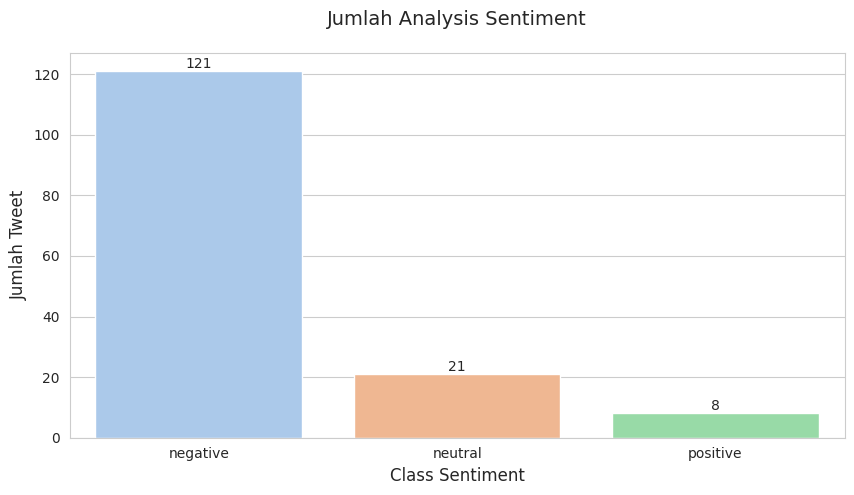

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['sentiment'].value_counts()

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analysis Sentiment', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

for i, count in enumerate(sentiment_count.values):
  ax.text(i, count+0.10, str(count), ha='center', va='bottom')

plt.show()

# LABELING DATA USE TEXTBLOB

In [ ]:
df3 = df2.copy()
df2.head()

,stemming_data
0,haaii jual netflix bulan k aja promo yuukk pu ...
1,lepas netflix tayang film dokumenter ice cold ...
2,watched ice cold documentary on netflix the mo...
3,ice cold on netflix is so good
4,httpstcodbhtffcylr people who have already wat...


In [1]:
!pip install textblob

ERROR: Operation cancelled by user


In [ ]:
from textblob import TextBlob

scores = []
labels = []

for text in df['stemming_data']:
  blob = TextBlob(text)
  polarity = blob.sentiment.polarity

  if polarity > 0 :
    label = 'positive'
  elif polarity < 0 :
    label = 'negative'
  elif polarity == 0 :
    label = 'neutral'

  scores.append(polarity)
  labels.append(label)



In [ ]:
df['sentiment'] = labels
df['sentiment_score'] = scores

data2 = ['stemming_data', 'sentiment_score', 'sentiment']
data2 = df[data2]

data2.head()

,stemming_data,sentiment_score,sentiment
0,haaii jual netflix bulan k aja promo yuukk pu ...,-0.091667,negative
1,lepas netflix tayang film dokumenter ice cold ...,-0.600000,negative
2,watched ice cold documentary on netflix the mo...,-0.120000,negative
3,ice cold on netflix is so good,0.050000,positive
4,httpstcodbhtffcylr people who have already wat...,0.000000,neutral


<ipython-input-48-ec8bc1d25352>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


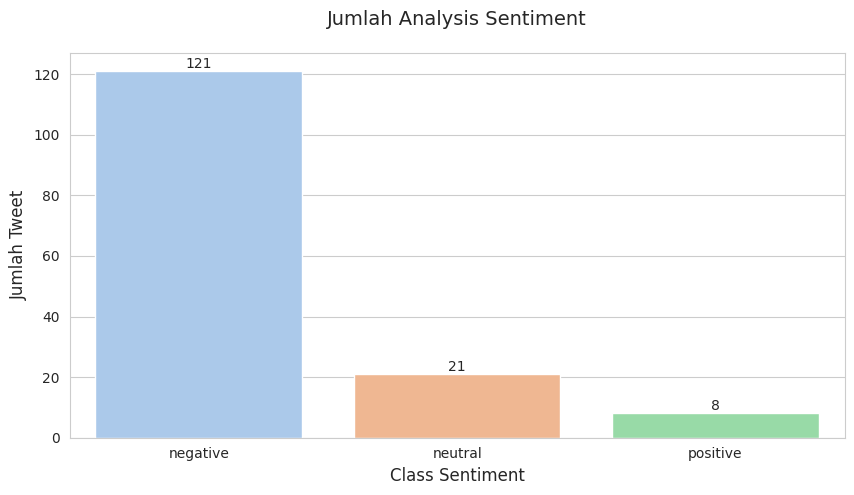

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data2['sentiment'].value_counts()

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analysis Sentiment', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

for i, count in enumerate(sentiment_count.values):
  ax.text(i, count+0.10, str(count), ha='center', va='bottom')

plt.show()

# LABELING DATA USE VADERSENTIMENT

In [ ]:
df3.head()

,stemming_data
0,haaii jual netflix bulan k aja promo yuukk pu ...
1,lepas netflix tayang film dokumenter ice cold ...
2,watched ice cold documentary on netflix the mo...
3,ice cold on netflix is so good
4,httpstcodbhtffcylr people who have already wat...


In [ ]:
!pip install VaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.5 MB/s eta 0:00:00


In [ ]:
analyser = SentimentIntensityAnalyzer()
scores = [analyser.polarity_scores(x) for x in df3['stemming_data']]
df3['Compound_Score'] =[x['compound'] for x in scores]

df3.head()


,stemming_data,Compound_Score
0,haaii jual netflix bulan k aja promo yuukk pu ...,0.2682
1,lepas netflix tayang film dokumenter ice cold ...,0.0000
2,watched ice cold documentary on netflix the mo...,-0.7346
3,ice cold on netflix is so good,0.5777
4,httpstcodbhtffcylr people who have already wat...,0.0000


In [ ]:
df3.loc[df3['Compound_Score']< 0, 'sentiment'] = 'negative'
df3.loc[df3['Compound_Score']== 0,'sentiment'] = 'neutral'
df3.loc[df3['Compound_Score']> 0, 'sentiment'] = 'positive'

df3.head()

,stemming_data,Compound_Score,sentiment
0,haaii jual netflix bulan k aja promo yuukk pu ...,0.2682,positive
1,lepas netflix tayang film dokumenter ice cold ...,0.0000,neutral
2,watched ice cold documentary on netflix the mo...,-0.7346,negative
3,ice cold on netflix is so good,0.5777,positive
4,httpstcodbhtffcylr people who have already wat...,0.0000,neutral


<ipython-input-49-676c9f1c5040>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


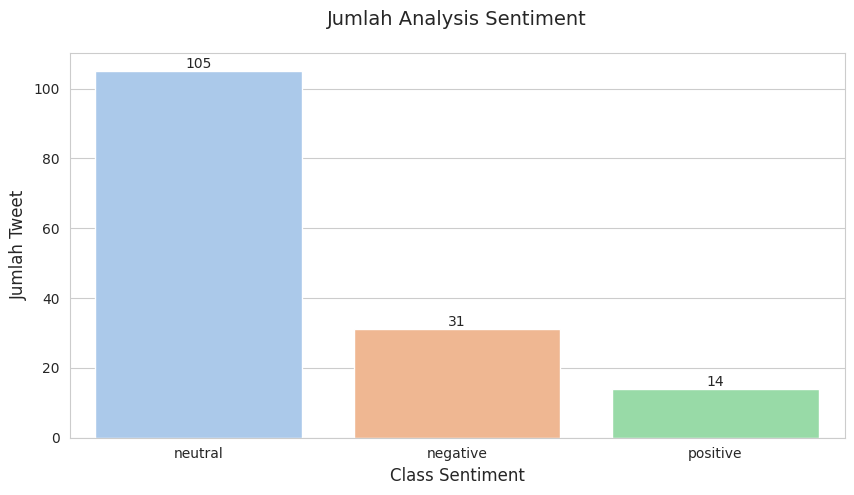

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = df3['sentiment'].value_counts()

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analysis Sentiment', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

for i, count in enumerate(sentiment_count.values):
  ax.text(i, count+0.10, str(count), ha='center', va='bottom')

plt.show()